In [2]:
import pandas as pd

df = pd.read_csv("DataPrepocessing.csv")

print(df.shape)
print(df.columns)

print(df.head())

print(df.info())
print(df.isna().mean().sort_values(ascending=False).head(20))

(48079, 98)
Index(['platform', 'country', 'region', 'language', 'category', 'hashtag',
       'title_keywords', 'author_handle', 'sound_type', 'music_track',
       'week_of_year', 'duration_sec', 'views', 'likes', 'comments', 'shares',
       'saves', 'engagement_rate', 'trend_label', 'source_hint', 'notes',
       'device_type', 'upload_hour', 'genre', 'trend_duration_days',
       'trend_type', 'engagement_velocity', 'dislikes', 'comment_ratio',
       'share_rate', 'save_rate', 'like_dislike_ratio', 'publish_dayofweek',
       'publish_period', 'event_season', 'tags', 'sample_comments',
       'creator_avg_views', 'creator_tier', 'season', 'publish_date_approx',
       'year_month', 'title', 'title_length', 'has_emoji',
       'avg_watch_time_sec', 'completion_rate', 'device_brand',
       'traffic_source', 'is_weekend', 'row_id', 'engagement_total',
       'like_rate', 'dislike_rate', 'engagement_per_1k',
       'engagement_like_rate', 'engagement_comment_rate',
       'engagement

In [3]:
text_cols = ["sample_comments", "title", "hashtag_clean", "tags_clean"]
print(df[text_cols].head(10))

         sample_comments                            title  hashtag_clean  \
0               ずっと見ちゃう😂  Night Routine — Productivity 🏖️      lifestyle   
1         This is fire 🔥         Football skills in 60s 📱         sports   
2          Instant like!           Football skills in 60s        workout   
3  Can’t stop watching 😂   Pro Tips for Valorant in 60s 🎮        esports   
4         So underrated!                    POV: Budget 😂         comedy   
5         This is fire 🔥          I flipped this sample 🧠            fyp   
6  Can’t stop watching 😂           24 Hours in Istanbul 🧠         travel   
7  Can’t stop watching 😂                Perfect — Cover 📱          music   
8       Thanks for this!                24 Hours in Seoul            fyp   
9            ¡Increíble!           Study With Me — 2025 ✨  learnontiktok   

                                     tags_clean  
0                    daily lifestyle motivation  
1                          gym football workout  
2            

In [4]:
!pip install transformers torch --quiet

In [5]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

df = pd.read_csv("DataPrepocessing.csv")

# Using sample_comments to do the sentiment analysis
text_col = "sample_comments"

print(df[text_col].head())

# Load the pre-trained sentiment model (multilingual)
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

sentiment_pipe = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    batch_size=32,
    truncation=True
)

# Perform sentiment analysis on all comments
texts = df[text_col].astype(str).tolist()
results = sentiment_pipe(texts)

df["sentiment_label_raw"] = [r["label"] for r in results]
df["sentiment_score"] = [r["score"] for r in results]

0                 ずっと見ちゃう😂
1           This is fire 🔥
2            Instant like!
3    Can’t stop watching 😂
4           So underrated!
Name: sample_comments, dtype: object


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

C:\Users\Surface\anaconda3\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Surface\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


In [6]:
def map_label(star_label: str) -> str:
    # star_label like "1 star" or "4 stars"
    n = int(star_label.split()[0])
    if n <= 2:
        return "negative"
    elif n == 3:
        return "neutral"
    else:
        return "positive"

df["sentiment_class"] = df["sentiment_label_raw"].apply(map_label)

In [7]:
print(df["sentiment_class"].value_counts())
print(df["sentiment_class"].value_counts(normalize=True))

sentiment_class
positive    43826
negative     2660
neutral      1593
Name: count, dtype: int64
sentiment_class
positive    0.911541
negative    0.055326
neutral     0.033133
Name: proportion, dtype: float64


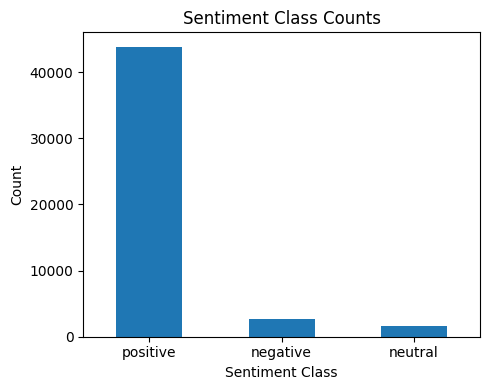

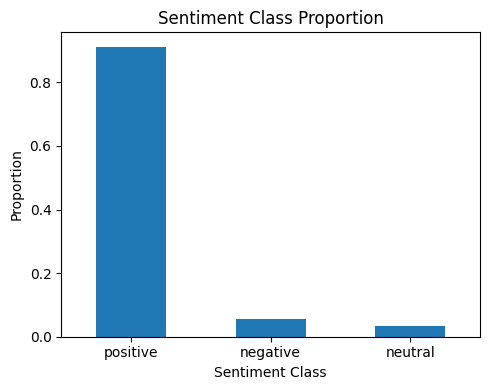

In [10]:
import matplotlib.pyplot as plt

# Absolute quantity bar chart
sent_counts = df["sentiment_class"].value_counts()

plt.figure(figsize=(5, 4))
sent_counts.plot(kind="bar")
plt.title("Sentiment Class Counts")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar chart of proportion
sent_props = df["sentiment_class"].value_counts(normalize=True)

plt.figure(figsize=(5, 4))
sent_props.plot(kind="bar")
plt.title("Sentiment Class Proportion")
plt.xlabel("Sentiment Class")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
# Platform dimension（TikTok vs YouTube）
platform_sentiment = df.groupby("platform")["sentiment_class"].value_counts(normalize=True).unstack()
print(platform_sentiment)

# Country dimension
country_sentiment = df.groupby("country")["sentiment_class"].value_counts(normalize=True).unstack().fillna(0)
print(country_sentiment.head())

# Category dimension
category_sentiment = df.groupby("category")["sentiment_class"].value_counts(normalize=True).unstack().fillna(0)
print(category_sentiment.head())

# genre dimension
genre_sentiment = df.groupby("genre") ["sentiment_class"].value_counts(normalize=True).unstack().fillna(0)
print(genre_sentiment.head())

sentiment_class  negative   neutral  positive
platform                                     
TikTok           0.055748  0.033074  0.911177
YouTube          0.054692  0.033221  0.912087
sentiment_class  negative   neutral  positive
country                                      
Ae               0.000000  0.256075  0.743925
Ar               0.333126  0.000000  0.666874
Au               0.000000  0.000000  1.000000
Br               0.000000  0.000000  1.000000
Ca               0.000000  0.000000  1.000000
sentiment_class  negative   neutral  positive
category                                     
Art              0.053768  0.035714  0.910518
Automotive       0.056927  0.028662  0.914411
Beauty           0.050767  0.036206  0.913026
Comedy           0.053945  0.034622  0.911433
DIY              0.056859  0.034592  0.908549
sentiment_class  negative   neutral  positive
genre                                        
Beauty           0.056117  0.031117  0.912766
Comedy           0.054772  0.03714

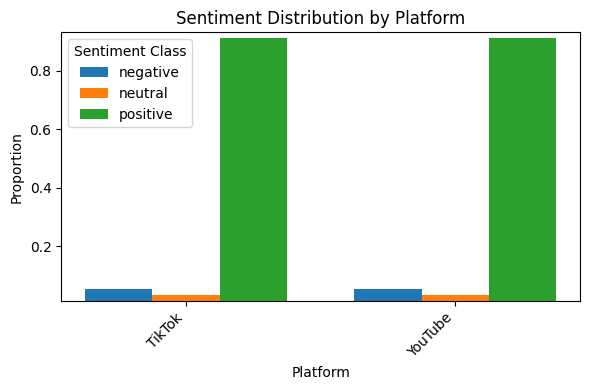

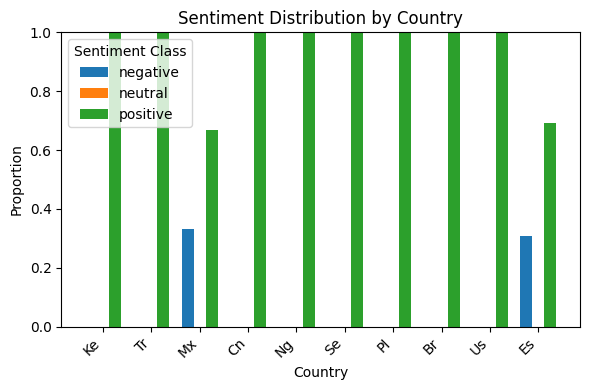

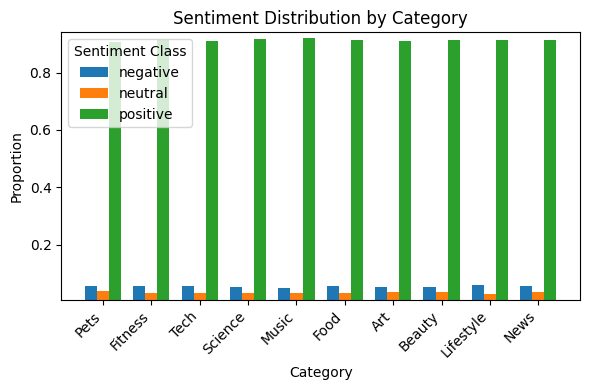

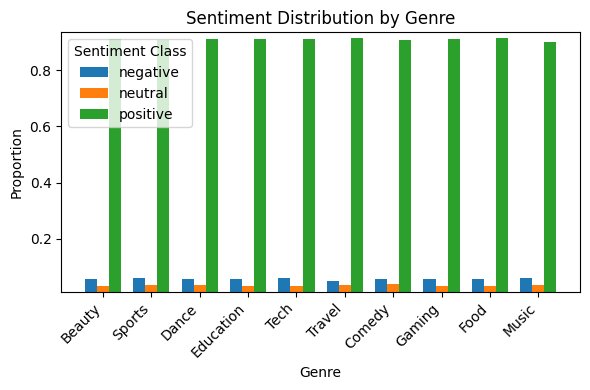

In [13]:
# Top 10 countries / categories / genres
top_countries  = df["country"].value_counts().head(10).index
country_top    = country_sentiment.loc[top_countries]

top_categories = df["category"].value_counts().head(10).index
category_top   = category_sentiment.loc[top_categories]

top_genres     = df["genre"].value_counts().head(10).index
genre_top      = genre_sentiment.loc[top_genres]

import numpy as np
import matplotlib.pyplot as plt

def plot_grouped_zoom(sent_table, index_name):
    """
    sent_table: index is dimension（platform/country/...），
                column is ['negative','neutral','positive'] DataFrame
    index_name: Name of the x-axis
    """
    labels = sent_table.index.to_list()
    x = np.arange(len(labels))
    width = 0.25  # The width of each column

    fig, ax = plt.subplots(figsize=(6, 4))

    # Three emotions are depicted on the same picture
    ax.bar(x - width, sent_table["negative"], width, label="negative")
    ax.bar(x,         sent_table["neutral"],  width, label="neutral")
    ax.bar(x + width, sent_table["positive"], width, label="positive")

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_xlabel(index_name)
    ax.set_ylabel("Proportion")
    ax.set_title(f"Sentiment Distribution by {index_name}")
    ax.legend(title="Sentiment Class")

    # Y-axis scaling, only around the current data range
    min_val = float(sent_table.min().min())
    max_val = float(sent_table.max().max())
    bottom = max(0, min_val - 0.02)
    top    = min(1, max_val + 0.02)
    ax.set_ylim(bottom, top)

    fig.tight_layout()
    plt.show()

# 1) Platform（TikTok / YouTube）
plot_grouped_zoom(platform_sentiment, "Platform")

# 2) Country（Top 10）
plot_grouped_zoom(country_top, "Country")

# 3) Category（Top 10）
plot_grouped_zoom(category_top, "Category")

# 4) Genre（Top 10）
plot_grouped_zoom(genre_top, "Genre")

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_grouped_zoom(sent_table, index_name):
    """
    sent_table: index is dimension（platform/country/...），
                column is ['negative','neutral','positive'] DataFrame
    index_name: Name of the x-axis
    """
    labels = sent_table.index.to_list()
    x = np.arange(len(labels))
    width = 0.25

    fig, ax = plt.subplots(figsize=(6, 4))

    ax.bar(x - width, sent_table["negative"], width, label="negative")
    ax.bar(x,         sent_table["neutral"],  width, label="neutral")
    ax.bar(x + width, sent_table["positive"], width, label="positive")

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_xlabel(index_name)
    ax.set_ylabel("Proportion")
    ax.set_title(f"Sentiment Distribution by {index_name}")
    ax.legend(title="Sentiment Class")

    min_val = float(sent_table.min().min())
    max_val = float(sent_table.max().max())
    bottom = max(0, min_val - 0.02)
    top    = min(1, max_val + 0.02)
    ax.set_ylim(bottom, top)

    fig.tight_layout()
    plt.show()

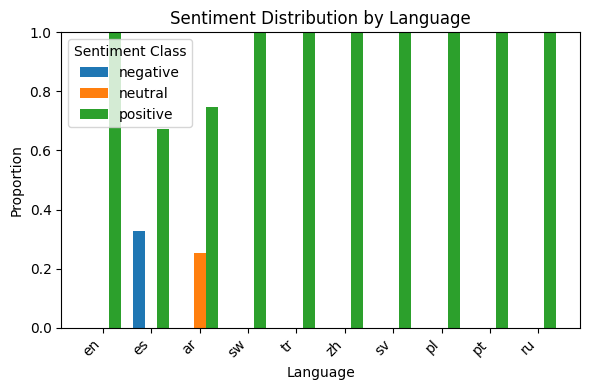

In [15]:
# By language, according to the statistical proportion
language_sentiment = (
    df.groupby("language")["sentiment_class"]
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)
)

# Only the top 10 languages with the largest sample sizes will be included.
top_langs = df["language"].value_counts().head(10).index
language_top = language_sentiment.loc[top_langs]

plot_grouped_zoom(language_top, "Language")

C:\Users\Surface\AppData\Local\Temp\ipykernel_14800\2028174447.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("views_bucket")["sentiment_class"]


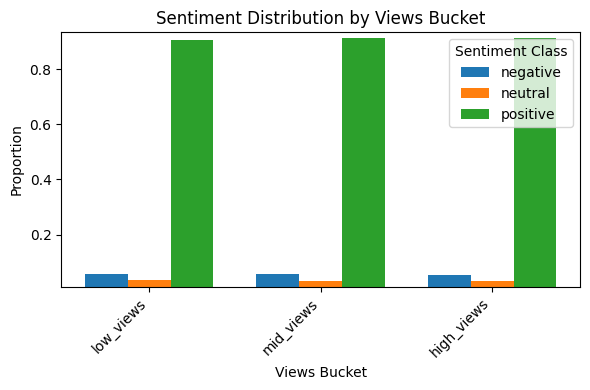

In [16]:
import pandas as pd

# Divide the views into 3 buckets based on quantiles.
if "views" in df.columns:
    df["views_bucket"] = pd.qcut(
        df["views"],
        q=3,
        labels=["low_views", "mid_views", "high_views"],
        duplicates="drop"
    )

    views_sentiment = (
        df.groupby("views_bucket")["sentiment_class"]
          .value_counts(normalize=True)
          .unstack()
          .fillna(0)
    )

    plot_grouped_zoom(views_sentiment, "Views Bucket")
else:
    print("no 'views' attribute")

C:\Users\Surface\AppData\Local\Temp\ipykernel_14800\624406122.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("eng_bucket")["sentiment_class"]


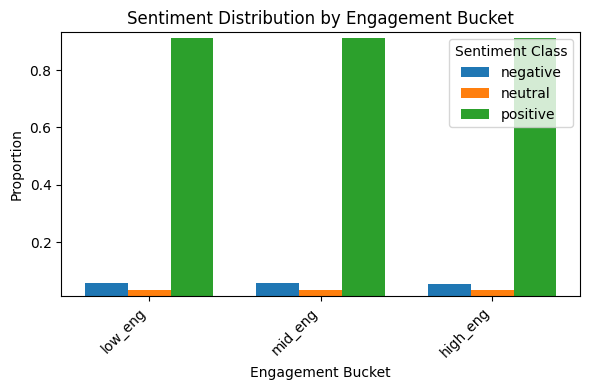

In [17]:
if set(["likes", "comments", "shares", "views"]).issubset(df.columns):

    # Calculate the interaction rate
    df["eng_rate"] = (
        (df["likes"] + df["comments"] + df["shares"])
        / df["views"].clip(lower=1)
    )

    # Divided into 3 buckets according to the quantiles
    df["eng_bucket"] = pd.qcut(
        df["eng_rate"],
        q=3,
        labels=["low_eng", "mid_eng", "high_eng"],
        duplicates="drop"
    )

    eng_sentiment = (
        df.groupby("eng_bucket")["sentiment_class"]
          .value_counts(normalize=True)
          .unstack()
          .fillna(0)
    )

    plot_grouped_zoom(eng_sentiment, "Engagement Bucket")
else:
    print("no one of likes/comments/shares/views")

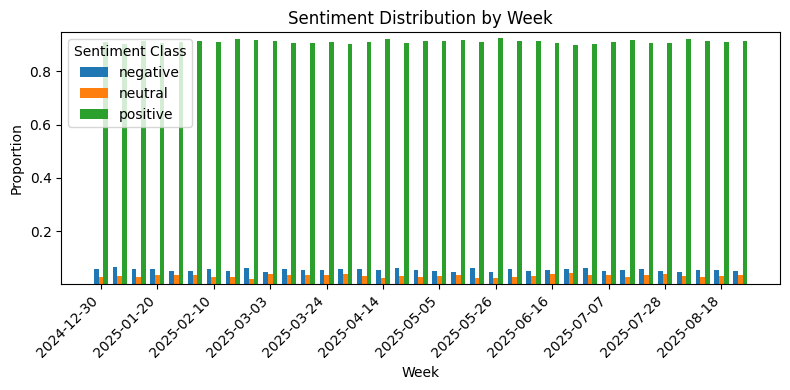

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make sure datetime
df["publish_date_approx"] = pd.to_datetime(df["publish_date_approx"], errors="coerce")
df_time = df.dropna(subset=["publish_date_approx"]).copy()

# Convert the date into "weeks"
df_time["year_week"] = df_time["publish_date_approx"].dt.to_period("W").dt.start_time

# Calculate the proportion of emotions on a weekly basis
week_sentiment = (
    df_time.groupby("year_week")["sentiment_class"]
           .value_counts(normalize=True)
           .unstack()
           .fillna(0)
           .sort_index()
)

# Grouped bar chart of three types of emotions on the same chart
def plot_grouped_zoom(sent_table, index_name):
    labels = [d.strftime("%Y-%m-%d") if hasattr(d, "strftime") else str(d)
              for d in sent_table.index]
    x = np.arange(len(labels))
    width = 0.25

    fig, ax = plt.subplots(figsize=(8, 4))

    ax.bar(x - width, sent_table["negative"], width, label="negative")
    ax.bar(x,         sent_table["neutral"],  width, label="neutral")
    ax.bar(x + width, sent_table["positive"], width, label="positive")

    # If there are too many weeks, only display a portion of the x-axis ticks to avoid them being crowded together
    if len(labels) > 10:
        step = len(labels) // 10
        tick_idx = np.arange(0, len(labels), step)
    else:
        tick_idx = np.arange(len(labels))

    ax.set_xticks(x[tick_idx])
    ax.set_xticklabels([labels[i] for i in tick_idx], rotation=45, ha="right")

    ax.set_xlabel(index_name)
    ax.set_ylabel("Proportion")
    ax.set_title(f"Sentiment Distribution by {index_name}")
    ax.legend(title="Sentiment Class")

    # Zooming out the y-axis to increase the contrast difference
    min_val = float(sent_table.min().min())
    max_val = float(sent_table.max().max())
    bottom = max(0, min_val - 0.02)
    top    = min(1, max_val + 0.02)
    ax.set_ylim(bottom, top)

    fig.tight_layout()
    plt.show()

plot_grouped_zoom(week_sentiment, "Week")

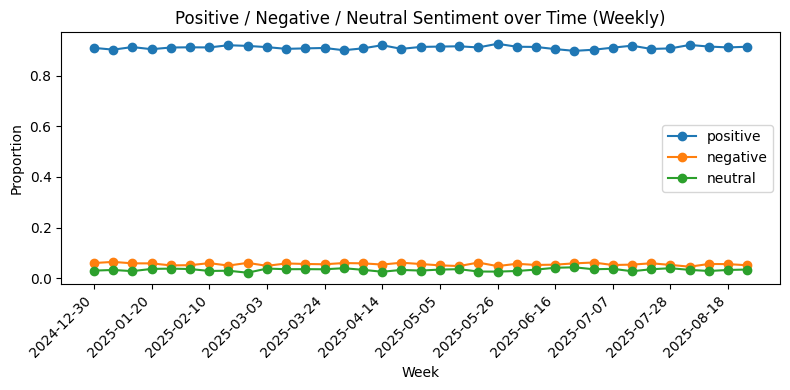

In [48]:
# Extract the ratio of positive to negative sentiments from the "week_sentiment" data
pos_by_week = week_sentiment["positive"]
neg_by_week = week_sentiment["negative"]
neu_by_week = week_sentiment["neutral"]

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(pos_by_week.index, pos_by_week.values, marker="o", label="positive")
ax.plot(neg_by_week.index, neg_by_week.values, marker="o", label="negative")
ax.plot(neu_by_week.index, neu_by_week.values, marker="o", label="neutral")

weeks = pos_by_week.index
labels = [d.strftime("%Y-%m-%d") for d in weeks]

if len(labels) > 10:
    step = len(labels) // 10
    tick_idx = np.arange(0, len(labels), step)
else:
    tick_idx = np.arange(len(labels))

ax.set_xticks(weeks[tick_idx])
ax.set_xticklabels([labels[i] for i in tick_idx], rotation=45, ha="right")

ax.set_xlabel("Week")
ax.set_ylabel("Proportion")
ax.set_title("Positive / Negative / Neutral Sentiment over Time (Weekly)")
ax.legend()

fig.tight_layout()
plt.show()

C:\Users\Surface\AppData\Local\Temp\ipykernel_14800\4079250057.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["genre", "views_bucket"])["sentiment_class"]


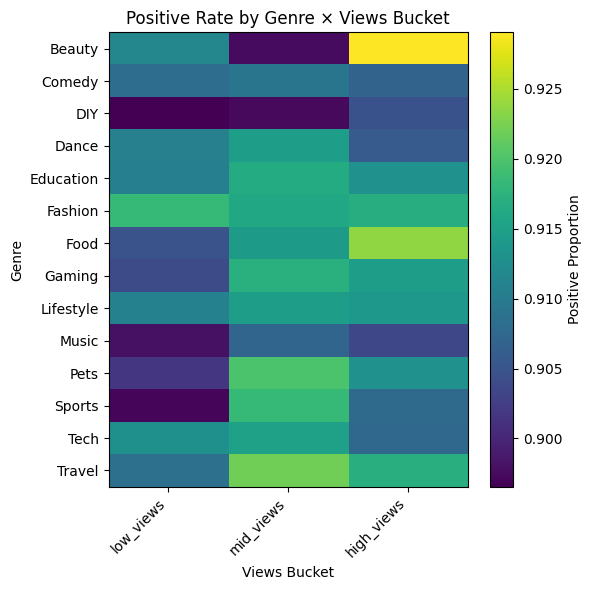

C:\Users\Surface\AppData\Local\Temp\ipykernel_14800\4079250057.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["genre", "views_bucket"])["sentiment_class"]


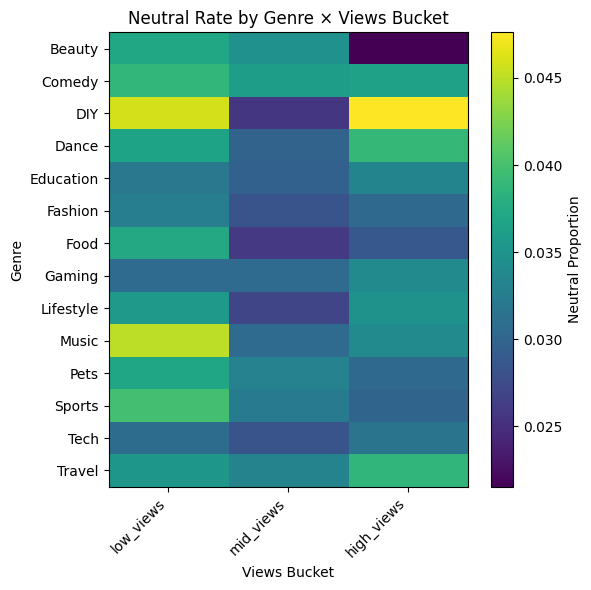

C:\Users\Surface\AppData\Local\Temp\ipykernel_14800\4079250057.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["genre", "views_bucket"])["sentiment_class"]


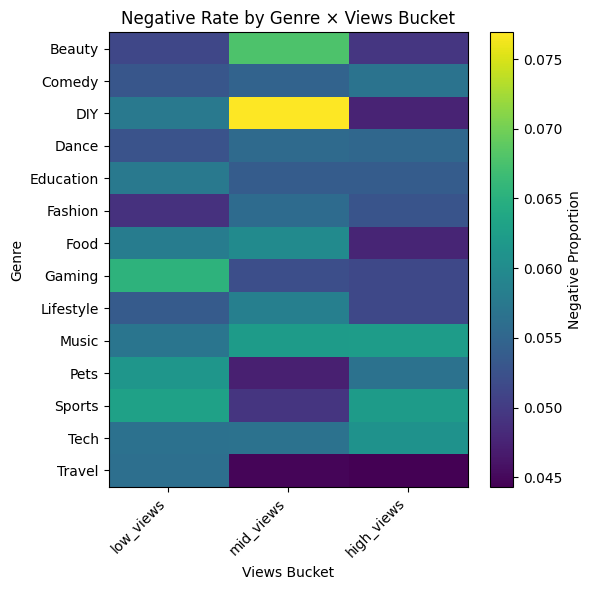

In [28]:
if "views_bucket" in df.columns:

    import matplotlib.pyplot as plt
    import numpy as np

    def plot_genre_views_heatmap(target_label, title_prefix):
        """
        target_label: 'positive' / 'negative' / 'neutral'
        """
        genre_views = (
            df.groupby(["genre", "views_bucket"])["sentiment_class"]
              .apply(lambda x: (x == target_label).mean())
              .unstack()
              .fillna(0)
        )

        fig, ax = plt.subplots(figsize=(6, 6))

        im = ax.imshow(genre_views.values, aspect="auto")

        ax.set_xticks(np.arange(len(genre_views.columns)))
        ax.set_yticks(np.arange(len(genre_views.index)))

        ax.set_xticklabels(genre_views.columns)
        ax.set_yticklabels(genre_views.index)

        plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

        ax.set_xlabel("Views Bucket")
        ax.set_ylabel("Genre")
        ax.set_title(f"{title_prefix} Rate by Genre × Views Bucket")

        fig.colorbar(im, ax=ax, label=f"{target_label.capitalize()} Proportion")

        plt.tight_layout()
        plt.show()

    # Positive proportion heat map
    plot_genre_views_heatmap("positive", "Positive")

    # Neutral proportion heat map
    plot_genre_views_heatmap("neutral", "Neutral")

    # Negative proportion heat map
    plot_genre_views_heatmap("negative", "Negative")

else:
    print("no 'views_bucket'")

## word cloud

In [31]:
pos_comments = df.loc[df["sentiment_class"] == "positive", "sample_comments"]
neg_comments = df.loc[df["sentiment_class"] == "negative", "sample_comments"]

In [32]:
import collections
import re
from wordcloud import STOPWORDS

def get_word_freq(series, min_len=2):
    """
    series: A series of text (such as pos_comments)
    min_len: Filter out words that are too short, for example, those with a length less than 2
    return: dict(word -> count)
    """
    counter = collections.Counter()
    stopwords = set(STOPWORDS)

    for text in series.dropna().astype(str):
        # Extract English words
        words = re.findall(r"[A-Za-z]+", text.lower())
        for w in words:
            if len(w) < min_len:
                continue
            if w in stopwords:
                continue
            counter[w] += 1

    return dict(counter)

In [33]:
pos_freq = get_word_freq(pos_comments)
neg_freq = get_word_freq(neg_comments)

print("POS sample:", sorted(pos_freq.items(), key=lambda x: x[1], reverse=True)[:20])
print("NEG sample:", sorted(neg_freq.items(), key=lambda x: x[1], reverse=True)[:20])

POS sample: [('underrated', 6503), ('fire', 6451), ('instant', 6444), ('thanks', 6416), ('stop', 6322), ('watching', 6322), ('gracias', 2175), ('por', 2175), ('compartir', 2175), ('incre', 2168), ('ble', 2168), ('merci', 535), ('pour', 535), ('le', 535), ('partage', 535), ('incroyable', 497)]
NEG sample: [('de', 2660), ('puedo', 2103), ('parar', 2103), ('mirar', 2103), ('je', 557), ('ne', 557), ('peux', 557), ('pas', 557), ('arr', 557), ('ter', 557), ('regarder', 557)]


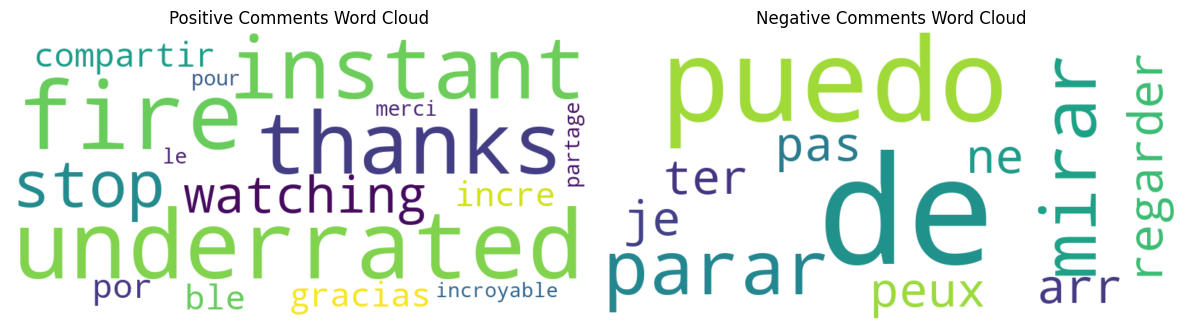

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = None

# Positive comment word cloud
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color="white",
    font_path=font_path
).generate_from_frequencies(pos_freq)

# Negative comment word cloud
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color="white",
    font_path=font_path
).generate_from_frequencies(neg_freq)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Comments Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Comments Word Cloud")

plt.tight_layout()
plt.show()